In [1]:
import os
import sys
os.chdir("..")
# sys.path.append(os.path.abspath('../'))


In [2]:
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import time
# import src.datasets.mvtec as mvtec
import cv2

# from __init__ import *
import __init__ as pi

In [3]:
tic = time.perf_counter()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = torch.device('cpu')
features_model = pi.Resnet18Features(device)

mean = torch.load('./distributions/up_mean_test2.pt').to(device)
cov_inv = torch.load('./distributions/up_cov_inv_test2.pt').to(device)

batch = pi.toBatch(images, device)

indices = pi.getOriginalResnet18Indicies(device)
thresh = 10
patch_scores, image_scores, patch_classifications, image_classifications = anomalyDetection(batch, features_model, mean, cov_inv, device, thresh, indices=indices)

print(time.perf_counter()-tic)


NameError: name 'images' is not defined

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device


device(type='cuda')

In [4]:
tic = time.perf_counter()
features_model = pi.Resnet18Features(device)
# features_model = WideResnet50Features(device)
print(time.perf_counter()-tic)

2.218390380963683


In [5]:
tic = time.perf_counter()
mean = torch.load('./distributions/up_mean_test2.pt').to(device)
cov_inv = torch.load('./distributions/up_cov_inv_test2.pt').to(device)
print(time.perf_counter()-tic)


0.06889018695801497


In [16]:
paths = [
#     '../data/aligned_pucks/defect_up/1622451238634_right_0_up.png', 
#     '../data/aligned_pucks/defect_up/1622451238634_right_1_up.png', 
#     '../data/aligned_pucks/defect_up/1622451238634_right_2_up.png', 
#     '../data/aligned_pucks/defect_up/1622451238634_right_3_up.png', 
#     '../data/aligned_pucks/defect_up/1622451238634_right_4_up.png', 
    '../image_collector/images/1624437490101_up0_.png',
    '../image_collector/images/1624437490101_up1_.png',
    '../image_collector/images/1624437490101_up2_.png',
    '../image_collector/images/1624437490101_up3_.png',
    '../image_collector/images/1624437490101_up4_.png',
]
images = []
for path in paths:
    im = cv2.imread(path)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    images.append(im)

In [17]:
tic = time.perf_counter()
batch = pi.toBatch(images, device)
print(time.perf_counter()-tic)


0.03518538607750088


In [18]:
batch.shape

torch.Size([5, 3, 224, 224])

In [19]:
indices = pi.getOriginalResnet18Indicies(device)
thresh = 10

In [20]:
tic = time.perf_counter()
patch_scores, image_scores, patch_classifications, image_classifications = pi.anomalyDetection(batch, features_model, mean, cov_inv, device, thresh, indices=indices)
print(time.perf_counter()-tic)


0.07108334801159799


In [21]:
image_scores

tensor([21.0396, 25.6908, 20.3764,  7.1055, 44.0565], device='cuda:0')

In [22]:
image_classifications

tensor([0., 0., 0., 1., 0.], device='cuda:0')

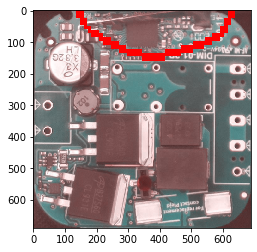

In [23]:
img = pi.getBoundaryImage(images[2], patch_classifications[2], 690)
plt.imshow(img)
plt.show()

0.12949236598797143


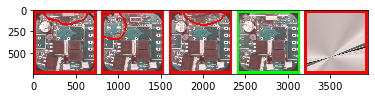

In [24]:
tic = time.perf_counter()
img = pi.getBoundaryImageClassificationGroup(images, patch_classifications, image_classifications, 690)
print(time.perf_counter()-tic)

plt.imshow(img)
plt.show()

In [19]:
def getAnomalyRes(images, mean, cov_inv):
    indices = pi.getOriginalResnet18Indicies(device)
    patch_scores, image_scores, patch_classifications, image_classifications = pi.anomalyDetectionNumpy(images, features_model, mean, cov_inv, device, 10, indices=indices)
    img = pi.getBoundaryImageClassificationGroup(images, patch_classifications, image_classifications, 690)
    return image_classifications, img

In [20]:
res, img = getAnomalyRes(images, mean, cov_inv)

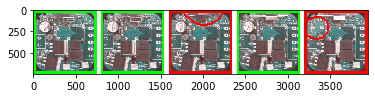

In [21]:
plt.imshow(img)
plt.show()